In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                sep=';')

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                sep=';')

In [6]:
# How to model immbalanced dataset
# which model performs best
# how to do benchmarking
# conclusion

In [7]:
df = pd.concat([df_red,df_white])

In [8]:
df_red.info() 

# type of data: float64(11), int64(1)
# number of rows: 1599 entries
# col count: total 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [11]:
set(df.quality) #checking unique values from the column

{3, 4, 5, 6, 7, 8, 9}

In [12]:
# change the data type
df['quality'] = pd.Categorical(df['quality'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null category
dtypes: category(1), float64(11)
memory usage: 615.8 KB


In [14]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [17]:
# Exploratory Data Analysis

In [18]:
import seaborn as sns

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


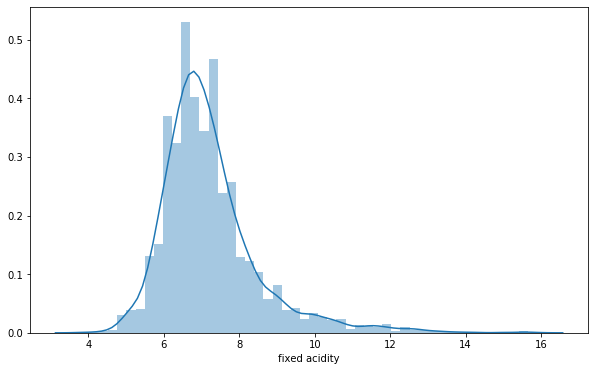

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['fixed acidity']) # this feature is marginally right skewed, some outlier values

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

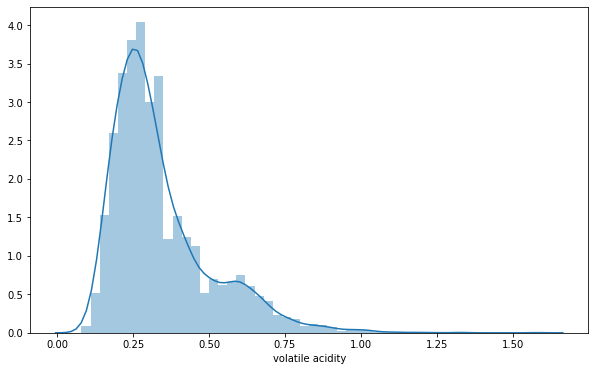

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['volatile acidity']) # this feature is right skewed, some outlier values

In [22]:
# checking the outlier values

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


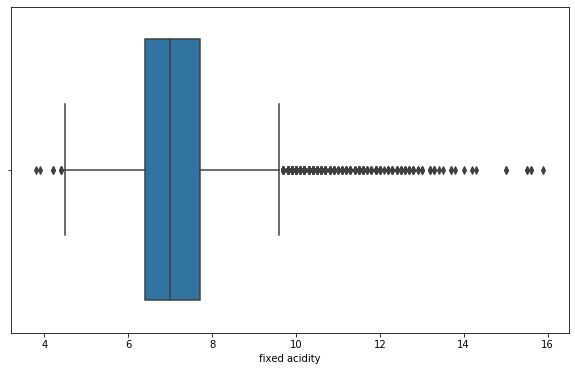

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fixed acidity'])

In [24]:
# if the number of outliers less than 10%, it is ok
# if it is more than 10%, you need to cap the data points

In [25]:
df['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [26]:
IQR = df['fixed acidity'].describe()[6] - df['fixed acidity'].describe()[4]
IQR

1.2999999999999998

In [27]:
UCL = df['residual sugar'].describe()[6] + (1.5 * IQR)
LCL = df['residual sugar'].describe()[4] - (1.5 * IQR)

In [28]:
LCL

-0.1499999999999997

In [29]:
UCL

10.049999999999999

# 5.38 % outlier on the right hand side

In [30]:
(df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100 # 5.38 % outlier on the right hand side

18.53162998306911

In [31]:
(df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 # 0.10 % outlier on the left hand side

0.0

In [32]:
((df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100) + (df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 

18.53162998306911

In [33]:
# skewness of the target or dependent column

In [34]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

In [35]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [36]:
# class balance by combining to the nearest class
df['quality'] = df.quality.replace({3: 4, 9: 8})

In [37]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     246
8     198
Name: quality, dtype: int64

In [38]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
# 'residual sugar' should be considered to be removed from the dataset

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar',
       'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].as_matrix()
Y = df['quality'].as_matrix()

Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y,test_size=0.20,
                                               random_state=1234)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


((5197, 11), (1300, 11), (5197,), (1300,))

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model1 = LogisticRegression()

In [46]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model1.fit(Xtrain,Ytrain)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model1.score(Xtrain,Ytrain)
#0.539157206080431(with 11 features)
#0.5326149701751011(with 9 features)

0.539349624783529

In [49]:
model1.score(Xtest,Ytest)
#0.5376923076923077(with 11 features)
#0.53 (with 9 features)

0.5376923076923077

In [50]:
# Existence of Outliers has no role in predicting the classes of wine quality, no impact on the accuracy

In [51]:
model1.intercept_

array([ 0.02760504,  3.11029961, -0.58576347, -3.99245049, -1.8992742 ])

In [52]:
model1.coef_

array([[-3.71334358e-02,  2.65251399e+00, -2.65764732e-01,
        -4.95452234e-02, -2.60639232e-02, -5.97577278e-02,
         1.10685318e-02,  1.28128835e-02, -2.36013868e-02,
        -1.90527122e+00, -2.23229924e-01],
       [ 2.12962162e-02,  3.08898130e+00,  6.53119902e-01,
        -4.34883618e-02,  7.99675674e-01, -1.12623682e-02,
         6.00682673e-03,  3.11201248e+00,  3.17526120e-01,
        -1.16604249e+00, -8.67807328e-01],
       [ 3.20720105e-02, -2.36381647e+00, -6.54416440e-01,
         1.90030628e-02,  5.96647756e-01,  6.56563919e-03,
        -3.45287524e-03, -5.25154597e-01,  7.54805825e-02,
         3.67102333e-01,  1.19217634e-01],
       [ 1.27698872e-02, -3.36290384e+00, -4.02695906e-01,
         3.62876920e-02, -1.81681865e+00,  1.06516070e-02,
        -5.64093207e-03, -3.98857136e+00, -2.84821671e-01,
         1.54462897e+00,  7.15711827e-01],
       [-3.77676621e-01, -9.94255083e-01,  6.62240233e-01,
         5.87498232e-02, -3.65945048e-01,  2.66185305e-02,
  

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
pred_quality = model1.predict(Xtest)

In [55]:
confusion_matrix(Ytest,pred_quality)

array([[  0,  32,  14,   0,   0],
       [  0, 267, 151,   1,   0],
       [  0, 140, 414,  10,   0],
       [  0,  15, 198,  18,   0],
       [  0,   2,  37,   1,   0]])

In [57]:
print(classification_report(Ytest,pred_quality))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        46
           5       0.59      0.64      0.61       419
           6       0.51      0.73      0.60       564
           7       0.60      0.08      0.14       231
           8       0.00      0.00      0.00        40

    accuracy                           0.54      1300
   macro avg       0.34      0.29      0.27      1300
weighted avg       0.52      0.54      0.48      1300



In [58]:
# grid search to identify the best parameters of the model

In [59]:
model2 = LogisticRegression()

In [69]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_estimator_
    return top_params

In [61]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be convert

In [62]:
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
param_grid = {"C": [0.001,0.05,0.1],
             #"penalty": ['l2','l1'],
              'solver':['newton-cg', 'lbfgs', 'liblinear']
             }

In [70]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter

In [71]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, model2, param_grid, cv=10)
print (top_para)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logis

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs f

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score

In [73]:
#paramCV = top_score[0].parameters
paramCV = {'C': 0.1, 'solver': 'newton-cg'}

In [74]:
model_final = LogisticRegression(C=paramCV['C'], 
                                solver=paramCV['solver'])

In [75]:
model_final

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
model_final.fit(Xtrain,Ytrain)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
model_final.score(Xtrain,Ytrain)

0.542620742736194

In [78]:
model_final.score(Xtest,Ytest)

0.54

In [79]:
# Limitations: why we are not getting a good accuracy?
# class imbalance
# outliers
# interaction between features
# non-linear relationship

In [80]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.037864
8    0.030476
Name: quality, dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [82]:
# Non-linear 

In [83]:
# Non-linear model: Decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model_dt = DecisionTreeClassifier() 

In [86]:
model_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
model_dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
model_dt.score(Xtrain,Ytrain)

1.0

In [89]:
model_dt.score(Xtest,Ytest)

0.5861538461538461

In [90]:
param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20],
             "max_depth": [2,5,7],
             "min_samples_leaf":[10]}

In [91]:
cvDT = DecisionTreeClassifier()

In [92]:
cvDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, cvDT, param_grid, cv=10)
print (top_para)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [95]:
#top_score = sorted(top_para,key=itemgetter(1), reverse=True)
#top_score

In [96]:
#paramCV = top_score[0].parameters
paramCV ={'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [97]:
best_dtmodel = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
best_dtmodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
best_dtmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
best_dtmodel.score(Xtrain,Ytrain)

0.6215124110063498

In [100]:
best_dtmodel.score(Xtest,Ytest)

0.5546153846153846

In [101]:
best_dtmodel.feature_importances_

array([0.04497174, 0.16661749, 0.01887765, 0.04792625, 0.07744303,
       0.06925625, 0.03046353, 0.0273538 , 0.03515243, 0.07933626,
       0.40260157])

In [102]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [103]:
temp = pd.DataFrame()
temp['variable'] = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
temp['VarImp'] = np.round(best_dtmodel.feature_importances_,2)

In [104]:
temp.sort_index(by='VarImp',ascending=False)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,variable,VarImp
10,alcohol,0.40
1,volatile acidity,0.17
4,chlorides,0.08
9,sulphates,0.08
5,free sulfur dioxide,0.07
3,residual sugar,0.05
0,fixed acidity,0.04
8,pH,0.04
6,total sulfur dioxide,0.03
7,density,0.03


In [105]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

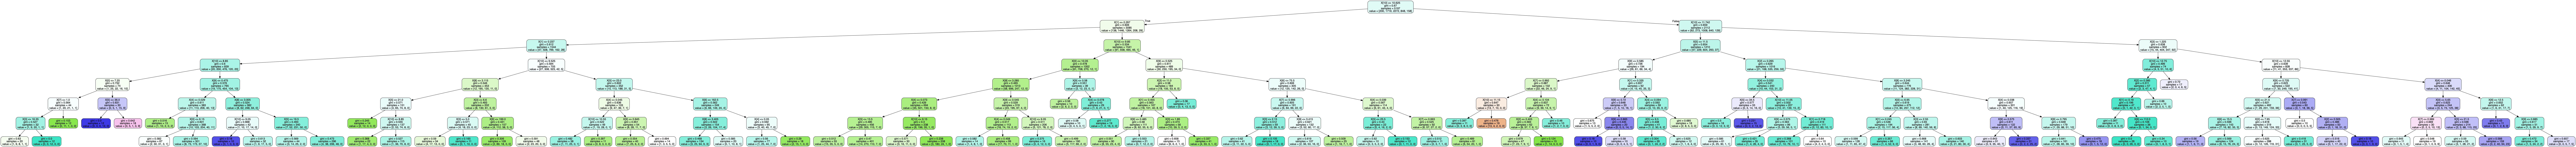

In [106]:
dot_data = tree.export_graphviz(best_dtmodel, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                )
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [107]:
graph.write_png('output.png')

True

In [108]:
from xgboost.sklearn import XGBClassifier

In [109]:
gbt = XGBClassifier()

In [110]:
gbt

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
gbt.fit(Xtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [113]:
pred_gbt = gbt.predict(Xtest)

In [114]:
confusion_matrix(Ytest,pred_gbt)

array([[  6,  26,  14,   0,   0],
       [  7, 263, 146,   3,   0],
       [  4, 125, 402,  31,   2],
       [  0,   8, 158,  63,   2],
       [  0,   0,  27,   8,   5]])

In [115]:
gbt.score(Xtrain,Ytrain)

0.6397921878006543

In [116]:
gbt.score(Xtest,Ytest)

0.5684615384615385

In [118]:
#help(XGBClassifier)